## Εξαγωγή χαρακτηριστικών ήχου ##
Εφαρμογή παραθύρου σε σήμα


In [1]:
# Εισαγωγή βιβλιοθηκών

import librosa
import scipy
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd


In [2]:
# Ορισμός συνάρτησης εφαρμογής παραθύρου
# Εφαρμόζει το παράθυρο στο σήμα εισόδου και επιστρέφει τα παραθυρωμένα frames, και το πλήρες παραθυρωμένο σήμα

def apply_window (y,frame_size=512,hop_length=512,win_type='hann'):
    
    # Αρχικοποίηση κενής λίστας
    windowed_sig=[] 
    # Αρχικοποίηση βοηθητικού σήματος
    windowed_signal=np.zeros(len(y)) 
    # Αρχικοποίηση μετρητή πλαισίων
    k=0
    
    # Βρόχος επανάληψης για την πλαίσιο-προς-πλαίσιο επεξεργασία
    for i in range(0,len(y),hop_length):
        # Εξαγωγή πλαισίου και αποθήκευση του ως τρέχον
        window_sig_curr_frame=y[i:i+frame_size]
        # Μέγεθος παραθύρου = μέγεθος τρέχοντος πλαισίου 
        window=scipy.signal.get_window(win_type,len(window_sig_curr_frame),fftbins=True)
        # Πολλαπλασιασμός παραθύρου με το τρέχον πλαίσιο
        window_sig_curr_frame*=window
        # Προσάρτιση στη λίστα
        windowed_sig.append(window_sig_curr_frame)
    # Αποθήκευση της λίστας πλαισίων ως πίνακα    
    windowed_sig_frames=np.array(windowed_sig,dtype=object) 
    
    # Βρόχος επανάληψης για την επανένωση σήματος
    for i in range(0,len(y),hop_length):
        
        # Συμπλήρωση τρέχοντος πλαισίου από αριστερά και δεξιά
        left_pad=i
        right_pad=len(y)-len(windowed_sig_frames[k])-i
        paded_windowed_sig=np.pad(windowed_sig[k], (i, right_pad), 'constant', constant_values=(0, 0))
        # Ένωση τρέχοντος πλαισίου με τα υπόλοιπα πλαίσια
        windowed_signal+=paded_windowed_sig
        # Αύξηση του μετρητή πλαισίων
        k+=1
    
    # Επιστροφή παραθυρωμένων πλαισίων, και παραθυρωμένου σήματος.
    return windowed_sig_frames,windowed_signal

In [3]:
#Αρχικοποίηση μήκους πλαισίου,μήκους βήματος 
FRAME_SIZE=512 
HOP_LENGTH=256

#Όταν το βήμα είναι μισό του μήκους πλαισίου έχουμε 50% επικάλυψη πλαισίων

> H βιβλιοθήκη librosa μας δίνει την δυνατότητα να φορτώσουμε ένα αρχείο ήχου με την εντολή librosa.load συναρτήσει του χρόνου.



Για την ανάγνωση αρχείων στο Google Collab προτείνεται η διαδικασία που φαίνεται εδώ: https://neptune.ai/blog/google-colab-dealing-with-files

In [4]:
#Αρχικοποίηση αρχείων/δειγμάτων
file_path="/content/piano C#.wav"
audio_sample, sr =librosa.load(file_path)

Για την εξυπηρέτηση των αναγκών της εγασίας αυτής, προτιμήθηκε η χρήση αρχείων μικρής διάρκειας και μίας νότας.

*Αν θέλαμε να φορτώσουμε κάποιο δοκιμαστικό αρχείο ήχου από την βιλβιοθήκη librosa :*

```
filename= librosa.ex('trumpet')
audio_sample, sr =librosa.load(filename)
```



In [5]:
ipd.Audio(data=audio_sample,rate=sr)

Text(0.5, 542.7176470588236, 'Χρόνος')

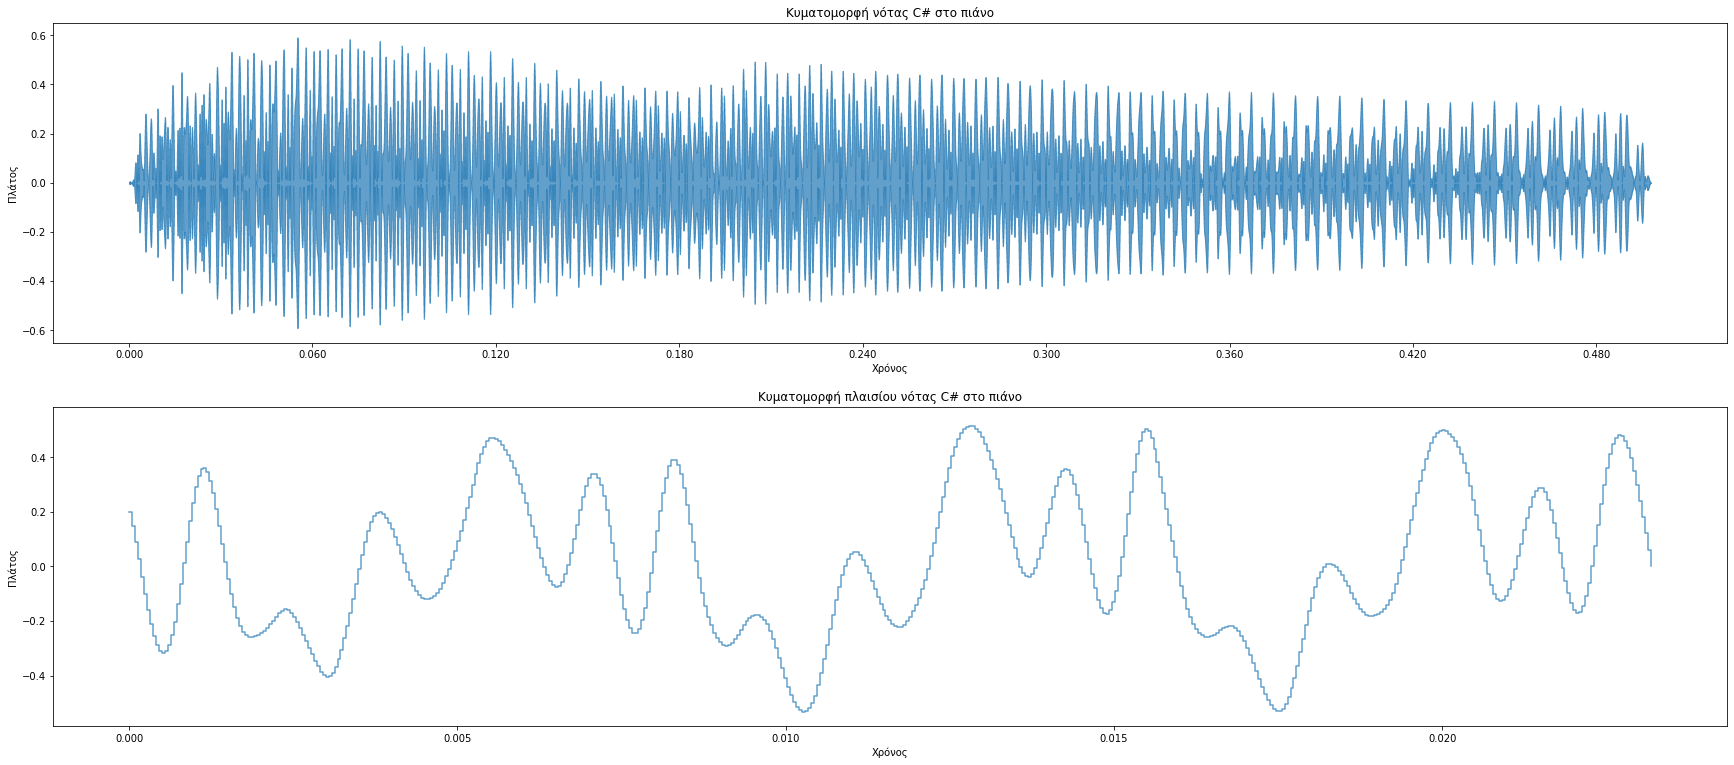

In [6]:
# Δημιουργία γραφήματος κυματομορφής ολόκληρου του audio sample 
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_sample, alpha=0.7)
plt.title("Κυματομορφή νότας C# στο πιάνο")
plt.ylabel("Πλάτος")
plt.xlabel("Χρόνος")

# και του πρώτου του πλαισίου

ax = plt.subplot(3, 1, 2)
librosa.display.waveshow(audio_sample[FRAME_SIZE:2*FRAME_SIZE], alpha=0.7)
plt.title("Κυματομορφή πλαισίου νότας C# στο πιάνο")
plt.ylabel("Πλάτος")
plt.xlabel("Χρόνος")


In [7]:
# Εφαρμογή παραθύρου στο σήμα
# επικάλυψη 50%
frames,windowed_signal=apply_window(y=audio_sample,frame_size=FRAME_SIZE,hop_length=HOP_LENGTH)

Text(0.5, 542.7176470588236, 'Χρόνος')

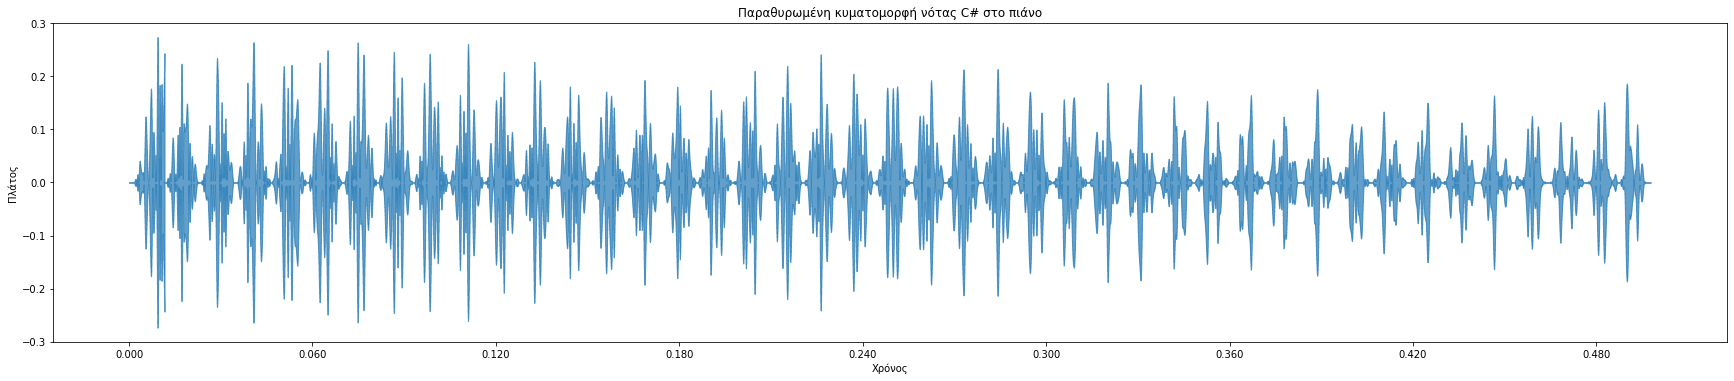

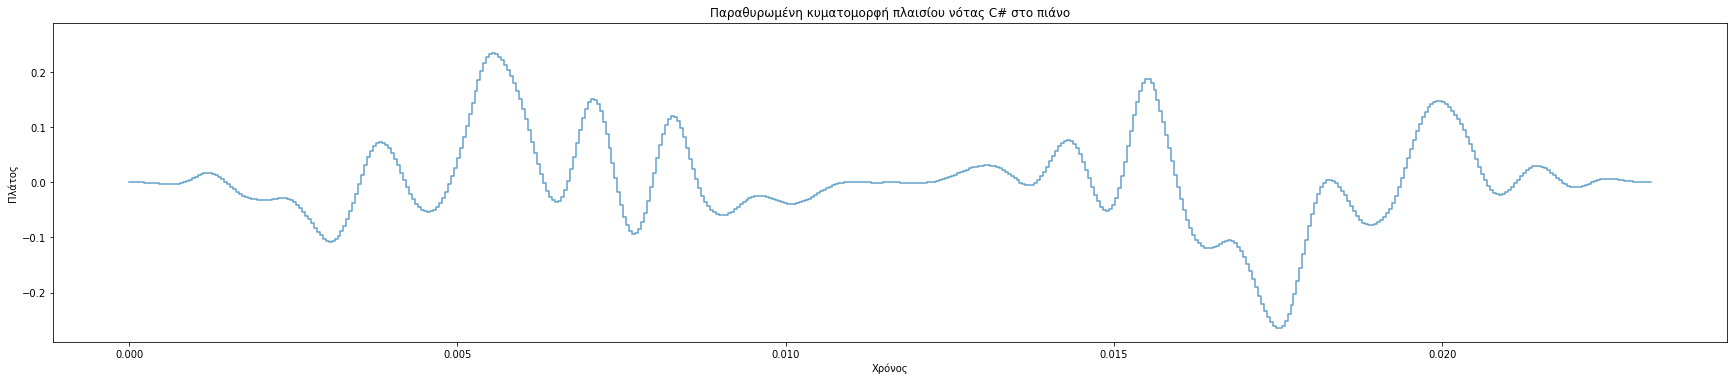

In [8]:
# Δημιουργία γραφήματος κυματομορφής ολόκληρου του παραθυρωμένου audio sample 
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(windowed_signal, alpha=0.7)
plt.title("Παραθυρωμένη κυματομορφή νότας C# στο πιάνο")
plt.ylabel("Πλάτος")
plt.xlabel("Χρόνος")

# και του πρώτου του πλαισίου

plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 2)
librosa.display.waveshow(windowed_signal[FRAME_SIZE:2*FRAME_SIZE], alpha=0.7)
plt.title("Παραθυρωμένη κυματομορφή πλαισίου νότας C# στο πιάνο")
plt.ylabel("Πλάτος")
plt.xlabel("Χρόνος")